In [1]:
# import andi
# import numpy as np
# import csv as csv
# import numpy as np

# from sklearn.metrics import mean_absolute_error
# import tensorflow as tf



# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation
# from keras.optimizers import SGD
# from keras import losses, metrics

# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import SimpleRNN
# from keras.layers import LSTM

# from keras.layers import Dropout
# from keras.layers import Bidirectional
# from keras.models import load_model
# import os
# from matplotlib import pyplot as plt
import andi
import numpy as np
import csv as csv
import numpy as np

from sklearn.metrics import mean_absolute_error
import tensorflow as tf



import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import losses, metrics

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM

from keras.layers import Dropout
from keras.layers import Bidirectional
from tensorflow.keras.models import load_model
from data_split import data_split

from many_net import many_net, many_net_diffv, many_net_only_diff, many_net_odcv_hd, many_net_only_diff_cont_varc, many_net_only_diff_cont_varc_2d_4_3d, many_net_only_diff_cont_varc_dim

Using TensorFlow backend.


In [2]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, Dropout, BatchNormalization, Flatten

from keras.regularizers import l2 as regularizer_l2

from keras.optimizers import Adam
#from keras.utlils.np_utils import to_categorical

In [3]:
from keras.initializers import glorot_uniform

In [20]:
provo1=np.asarray([np.arange(15),10*np.arange(15)])

In [22]:
provo1.shape

(2, 15)

In [14]:
provo2 = provo1.reshape(5,3)

In [15]:
provo2

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [23]:
provo3 = provo1.reshape(-1,3,5)

In [25]:
provo3.shape

(2, 3, 5)

In [26]:
provo3

array([[[  0,   1,   2,   3,   4],
        [  5,   6,   7,   8,   9],
        [ 10,  11,  12,  13,  14]],

       [[  0,  10,  20,  30,  40],
        [ 50,  60,  70,  80,  90],
        [100, 110, 120, 130, 140]]])

In [31]:
provo4=np.transpose(provo3,axes=[0,2,1])

In [35]:
provo4[0]

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [32]:
provo4.shape

(2, 5, 3)

In [ ]:
np.transpose(aa.reshape(-1,block_size,int(length/block_size),axes=[0,2,1])

In [13]:
provo4.shape

(5, 3)

In [109]:
os.getcwd()

'/Users/stebo/andi_num/ANDI_datasets-master'

In [2]:
AD = andi.andi_datasets()


Important to create a "balanced" data set

In [4]:
i=200
bb={}
cc={}
cl=[200]
j=0
for i in cl:
    X1, Y1, X2, Y2, X3, Y3 = AD.andi_dataset(N = 100000, tasks = 3, dimensions = 1,
                                             min_T = i, max_T = i+1, load_dataset=True, path_datasets=str(i))
    bb[i]=X3[0]
    cc[i]=Y3[0]

Creating a dataset for task(s) 3 and dimension(s) 1.


In [ ]:
Y3[0]

In [ ]:
np.asarray(cc[200])

In [ ]:
np.min(cc[200][:,1])

In [ ]:
plt.hist(cc[200][:,1])

In [ ]:
np.shape(cc[200])

In [ ]:
np.asarray(cc[200])[:,4]

In [ ]:
ss[0]

In [37]:
#label for changing point and alpha. entries from andi are (dimension, tc,class1,a1,class2,a2) 
#I want (a1,a2,sin(2pi*tc/T),cos(2pi*tc/T))
#NB it seems like the data shape chages when you produce or load the data!!! when you create it it also has the entry telling you the dimension
# if working with loaded data use corr=1 otherwise 0
corr=1
# ccv=np.asarray(cc[200])
# ss=np.shape(ccv)
ccl=np.zeros((ss[0],4))
ccl[:,0]=ccv[:,3-corr]
ccl[:,1]=ccv[:,5-corr]
ccl[:,2]=np.sin((2*np.pi*ccv[:,1-corr])/200)
ccl[:,3]=np.cos((2*np.pi*ccv[:,1-corr])/200)

NameError: name 'ss' is not defined

In [ ]:
ccl[2]

In [2]:
#1d
AD = andi.andi_datasets()
bbv={}
ccv={}
#cl=25+100*np.arange(10)
cl=[200]
j=0
for i in cl:
    X1, Y1, X2, Y2, X3, Y3 = AD.andi_dataset(N = 5000, tasks = 3, dimensions = 1,
                                             min_T = i, max_T = i+1, load_dataset=True, path_datasets=str(i)+'val')
    bbv[i]=X3[0]
    ccv[i]=Y3[0]

Creating a dataset for task(s) 3 and dimension(s) 1.


In [4]:
#2d
AD = andi.andi_datasets()
bbv={}
ccv={}
#cl=25+100*np.arange(10)
cl=[200]
j=0
for i in cl:
    X1, Y1, X2, Y2, X3, Y3 = AD.andi_dataset(N = 5000, tasks = 3, dimensions = 2,
                                             min_T = i, max_T = i+1, load_dataset=True, path_datasets=str(i)+'val')
    bbv[i]=X3[1]
    ccv[i]=Y3[1]

Creating a dataset for task(s) 3 and dimension(s) 2.


In [13]:
corr=1
ccvv=np.asarray(ccv[200])
ss=np.shape(ccvv)
cclv=np.zeros((ss[0],4))
cclv[:,0]=ccvv[:,3-corr]
cclv[:,1]=ccvv[:,5-corr]
cclv[:,2]=np.sin((2*np.pi*ccvv[:,1-corr])/200)
cclv[:,3]=np.cos((2*np.pi*ccvv[:,1-corr])/200)

In [22]:
ccvv

array([[1.38e+02, 3.00e+00, 1.80e+00, 1.00e+00, 4.50e-01],
       [4.50e+01, 2.00e+00, 4.00e-01, 2.00e+00, 1.95e+00],
       [1.30e+02, 3.00e+00, 2.00e+00, 4.00e+00, 2.50e-01],
       ...,
       [1.50e+02, 4.00e+00, 5.00e-01, 0.00e+00, 1.00e-01],
       [9.20e+01, 2.00e+00, 1.00e+00, 2.00e+00, 1.95e+00],
       [1.00e+00, 2.00e+00, 1.00e-01, 1.00e+00, 3.00e-01]])

In [4]:
ccvm={}
for i in cl:
    ccvm[i]=np.zeros((len(ccv[i]),5))
    print(ccvm[i])
    print(ccvm[i][j][2])
    for j in range(len(ccv[i])):
        ccvm[i][j][int(ccv[i][j])]=1

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0.0


TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

In [6]:
#FUNCTION TO TURN SPLIT DATA IN NORMALIZED SUB-TRAJECTORIES.
#Possible to choose data corresponding to a certain interval of h
#USING TIMES TOO Otpion to normalize!!
#Should find a more elegant way of using the hmin and hmax, now i have to express it anyway
def data_split(data_tot,meas_times,labels,start_row,num_row,traj_len,
               n_in,n_samples,hmin=0.,hmax=1,limith=False,normalization=True,p_p=1):
    '''
    returns data_tot: collection of recorded trajectories and associated time stamps,
    split into normalized sub-trajectories. It also returns the associated labels, and
    separately the time stamps and trajectories.
    PARAMETERS EXPLANATION:
    meas_times: times at which the position was recorded,
    labels: the true exponent corresponding with which the trajectory was generated
    start_row: exclude recorded trajectories with index i<start_row
    num_row: number of recorde trajectories to use (NB the actual number
    will be <total number-start_row) 
    traj_len: length of the trajectory segments to output
    n_in: starting data point from the recorded data
    n_samples: number of the trajectory segments to take from each recorded trajectory
    h_min: use only trajectories genearted with h>h_min
    h_max: use only trajectories genearted with h<h_max
    p_p: factor introduced to roughly normalize the time steps so that the total trajectory
    duration is close to 1'''
    j=0



    tr=data_tot[start_row:num_row+start_row]
    sel_times=meas_times[start_row:num_row+start_row]
    tar=labels[start_row:num_row+start_row]

    if(limith==True):
        
        tr=tr[np.where((tar<=hmax) & (tar >=hmin))]
        sel_times=sel_times[np.where((tar<=hmax) & (tar >=hmin))]
        tar=tar[((tar<=hmax) & (tar >=hmin))]

    if(n_samples>1):
        
        gap=int((data_tot.shape[1]-n_in-traj_len)/(n_samples-1))
    else:
        gap=0    
    print("n initial=",n_in,"gap=",gap)
    if(gap<traj_len):
        print("warning!! Overlapping trajectories. gap=",
              gap,"trajectory length=",traj_len,"final_point=",
              (n_samples-1)*gap+n_in+traj_len,"data length",data_tot.shape[1])

    if(normalization==True):
        trj=tr[:,n_in+gap*j:n_in+gap*j+traj_len]
        test_data_new=(trj-(np.tile(np.transpose([np.mean(trj,axis=1)]),
                                    (1,traj_len))))/(np.tile(np.transpose([np.std(trj,axis=1)]),
                                                             (1,traj_len)))
        test_times=np.cumsum(np.insert(np.diff(sel_times[:,n_in+gap*j:n_in+gap*j+traj_len])
                                       ,0,0, axis=1),axis=1)
#train_data_new=(data_tot[start_row:30000,:traj_len]-(np.tile(np.transpose([np.mean(data_tot[start_row:30000,:traj_len],axis=1)]),(1,traj_len))))/(np.tile(np.transpose([np.std(data_tot[start_row:30000,:traj_len],axis=1)]),(1,traj_len)))
        test_labels_large=tar
#test_labels=labels[start_row:num_row+start_row]
        #print(test_data_new.shape)
        #print("trj=",trj.shape)
        #print("sart=",n_in+gap*j,"end=",n_in+gap*j+traj_len)
        for j in range(1,n_samples):
            trj=tr[:,n_in+gap*j:n_in+gap*j+traj_len]
            #print("sart=",n_in+gap*j,"end=",n_in+gap*j+traj_len)
            #print(trj.shape)
            test_data_new=np.concatenate((test_data_new,(trj-(np.tile(np.transpose([np.mean(trj,axis=1)]),(1,traj_len))))/(np.tile(np.transpose([np.std(trj,axis=1)]),(1,traj_len)))),axis=0)
    #test_data_new=np.concatenate((test_data_new,(data_tot2[:,n_in+gap*j:n_in+gap*j+traj_len]-np.mean(data_tot2[:,n_in+gap*j:n_in+gap*j+traj_len]))/np.std(data_tot2[:,n_in+gap*j:n_in+gap*j+traj_len])),axis=0)
            test_labels_large=np.append(test_labels_large,tar)
            test_times=np.concatenate((test_times,np.cumsum(np.insert(np.diff(sel_times[:,n_in+gap*j:n_in+gap*j+traj_len]),0,0, axis=1),axis=1)),axis=0)
    #test_labels=np.append(test_labels,many_label2)  
    else:
        test_data_new=tr[:,n_in+gap*j:n_in+gap*j+traj_len]
        test_times=np.cumsum(np.insert(np.diff(sel_times[:,n_in+gap*j:n_in+gap*j+traj_len]),
                                       0,0, axis=1),axis=1)
#train_data_new=(data_tot[start_row:30000,:traj_len]-(np.tile(np.transpose([np.mean(data_tot[start_row:30000,:traj_len],axis=1)]),(1,traj_len))))/(np.tile(np.transpose([np.std(data_tot[start_row:30000,:traj_len],axis=1)]),(1,traj_len)))
        test_labels_large=tar
#test_labels=labels[start_row:num_row+start_row]
        for j in range(1,n_samples):
            test_data_new=np.concatenate((test_data_new,tr[:,n_in+gap*j:n_in+gap*j+traj_len]),
                                         axis=0)
    #test_data_new=np.concatenate((test_data_new,(data_tot2[:,n_in+gap*j:n_in+gap*j+traj_len]-np.mean(data_tot2[:,n_in+gap*j:n_in+gap*j+traj_len]))/np.std(data_tot2[:,n_in+gap*j:n_in+gap*j+traj_len])),axis=0)
            test_labels_large=np.append(test_labels_large,tar)
            test_times=np.concatenate((test_times,np.cumsum(
                np.insert(np.diff(sel_times[:,n_in+gap*j:n_in+gap*j+traj_len]),0,0, axis=1),
                axis=1)),axis=0)
    #test_labels=np.append(test_labels,many_label2) 
        


#normalization of time stamps, potentially dangerous!!!!!!!
    test_times=test_times*p_p/traj_len
    
#RESHAPING
    test_set=np.transpose(np.array((np.transpose(test_data_new),np.transpose(test_times))))  
    return test_set, test_labels_large, test_data_new,test_times
   

In [6]:
#LTSM network for learning alpha of the two segments and teh switching point, Normalized trajectories!!!

#Building the network
model_switch_a_t = Sequential()
#first layer: LSTM of dimension 64
model_switch_a_t.add(LSTM(64,
                return_sequences=True,
                dropout=0,
                recurrent_dropout=0,
                input_shape=(None, 2)
                ))

#second layer: LSTM of dimension 16
model_switch_a_t.add(LSTM(16,
                dropout=0,
                recurrent_dropout=0))
#Last layer, fully connected
model_switch_a_t.add(Dense(4))
model_switch_a_t.compile(optimizer='adam',
                loss='mse', 
                metrics=['mae'])

#Printing a summary of the built network
model_switch_a_t.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 64)          17152     
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                5184      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 68        
Total params: 22,404
Trainable params: 22,404
Non-trainable params: 0
_________________________________________________________________


In [ ]:
bb[200].shape

In [7]:
#Training
i=200
#[32, 128]:
   
   
    

test_tim_step=np.arange(i)
show_time_coll=np.tile(test_tim_step,(len(bb[i]),1))
data_show,label_show,traj_show,times_show=data_split(np.asarray(bb[i]),
                                                     show_time_coll,
                                                         labels=ccl,
                                                         start_row=0,num_row=len(bb[i]),
                                                         traj_len=i,n_in=0,n_samples=1,
                                                         p_p=1,hmin=0,hmax=2,limith=False,normalization=True)
for batch_size in [32,128]:
    history_switch_a_t =model_switch_a_t.fit(data_show, 
                        label_show,validation_split=0.2,
                        epochs=10-int(i/200), 
                        batch_size=batch_size,
                        shuffle=True)
    model_switch_a_t.save('task3_a_t.h5')


    
    #                     ,validation_data=(data_val, 
    #                     label_val))

n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 200 final_point= 200 data length 200
Train on 80000 samples, validate on 20000 samples
Epoch 1/9
80000/80000 [==============================] - 1497s 19ms/step - loss: 0.3874 - mae: 0.5353 - val_loss: 0.3738 - val_mae: 0.5264
Epoch 2/9
80000/80000 [==============================] - 1495s 19ms/step - loss: 0.3546 - mae: 0.5030 - val_loss: 0.3288 - val_mae: 0.4787
Epoch 3/9
80000/80000 [==============================] - 1492s 19ms/step - loss: 0.3092 - mae: 0.4546 - val_loss: 0.2845 - val_mae: 0.4245
Epoch 4/9
80000/80000 [==============================] - 1480s 19ms/step - loss: 0.2635 - mae: 0.4044 - val_loss: 0.2375 - val_mae: 0.3767
Epoch 5/9
  320/80000 [..............................] - ETA: 23:02 - loss: 0.2440 - mae: 0.3822

KeyboardInterrupt: 

In [8]:
model_switch_a_t.save('task3_a_t.h5')

In [7]:
model_switch_a_t=load_model('task3_a_t.h5')

In [8]:
model_switch_a_t_rev=load_model('task3_a_t_rev.h5')

In [8]:
#Training
i=200
#[32, 128]:
   
   
    

test_tim_step=np.arange(i)
show_time_coll=np.tile(test_tim_step,(len(bb[i]),1))
data_show,label_show,traj_show,times_show=data_split(np.asarray(bb[i]),
                                                     show_time_coll,
                                                         labels=ccl,
                                                         start_row=0,num_row=len(bb[i]),
                                                         traj_len=i,n_in=0,n_samples=1,
                                                         p_p=1,hmin=0,hmax=2,limith=False,normalization=True)
for batch_size in [32]:
    history_switch_a_t =model_switch_a_t.fit(data_show, 
                        label_show,validation_split=0.2,
                        epochs=5, 
                        batch_size=batch_size,
                        shuffle=True)
    model_switch_a_t.save('task3_a_t.h5')


    
    #                     ,validation_data=(data_val, 
    #                     label_val))

n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 200 final_point= 200 data length 200
Train on 80000 samples, validate on 20000 samples
Epoch 1/5
80000/80000 [==============================] - 1526s 19ms/step - loss: 0.2218 - mae: 0.3594 - val_loss: 0.2054 - val_mae: 0.3380
Epoch 2/5
80000/80000 [==============================] - 1505s 19ms/step - loss: 0.1917 - mae: 0.3270 - val_loss: 0.1811 - val_mae: 0.3161
Epoch 3/5
80000/80000 [==============================] - 1501s 19ms/step - loss: 0.1764 - mae: 0.3091 - val_loss: 0.1718 - val_mae: 0.3029
Epoch 4/5
80000/80000 [==============================] - 1511s 19ms/step - loss: 0.1677 - mae: 0.2984 - val_loss: 0.1663 - val_mae: 0.2966
Epoch 5/5
80000/80000 [==============================] - 1498s 19ms/step - loss: 0.1613 - mae: 0.2908 - val_loss: 0.1636 - val_mae: 0.2961


In [8]:
#Training
i=200
#[32, 128]:
   
   
    

test_tim_step=np.arange(i)
show_time_coll=np.tile(test_tim_step,(len(bb[i]),1))
data_show,label_show,traj_show,times_show=data_split(np.asarray(bb[i]),
                                                     show_time_coll,
                                                         labels=ccl,
                                                         start_row=0,num_row=len(bb[i]),
                                                         traj_len=i,n_in=0,n_samples=1,
                                                         p_p=1,hmin=0,hmax=2,limith=False,normalization=True)
for batch_size in [128]:
    for j in range(10):
        print(j)
        history_switch_a_t =model_switch_a_t.fit(data_show, 
                            label_show,validation_split=0.2,
                            epochs=1, 
                            batch_size=batch_size,
                            shuffle=True)
        model_switch_a_t.save('task3_a_t.h5')


    
    #                     ,validation_data=(data_val, 
    #                     label_val))

n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 200 final_point= 200 data length 200
0
Train on 80000 samples, validate on 20000 samples
Epoch 1/1
80000/80000 [==============================] - 684s 9ms/step - loss: 0.1492 - mae: 0.2753 - val_loss: 0.1511 - val_mae: 0.2767
1
Train on 80000 samples, validate on 20000 samples
Epoch 1/1
80000/80000 [==============================] - 671s 8ms/step - loss: 0.1476 - mae: 0.2732 - val_loss: 0.1505 - val_mae: 0.2781
2
Train on 80000 samples, validate on 20000 samples
Epoch 1/1
80000/80000 [==============================] - 674s 8ms/step - loss: 0.1470 - mae: 0.2723 - val_loss: 0.1476 - val_mae: 0.2741
3
Train on 80000 samples, validate on 20000 samples
Epoch 1/1
80000/80000 [==============================] - 676s 8ms/step - loss: 0.1458 - mae: 0.2707 - val_loss: 0.1473 - val_mae: 0.2713
4
Train on 80000 samples, validate on 20000 samples
Epoch 1/1
80000/80000 [==============================] - 674s 8ms/step - 

In [ ]:
model_switch_a_t

# Inferring the type of model

We will explore 2 possibilities. The first one is using the inferred change point to split the data and pass it to the classifier trained for task 2. The second one will need training 2 new classifiers, one for the classification of the model of the first segment and one for the classification of the second segment

Inferring the model of the first segment

In [9]:
def my_atan(x1,x2):
    y=np.arctan2(x1,x2)
    b=y<0
    c=b.astype(int)*(2*np.pi)
    d=y+c 
    return    d;

Importing the network trained for classiying trajectories of length 100. NB the current version has a low accuracy with F1= 0.70

In [12]:
model_classi_norm_100 = load_model('task2_1d_classi_norm_100.h5')

In [13]:
model_switch_a_t = load_model('task3_a_t.h5')

In [14]:
model_norm_short=load_model('task1_1d_v0_norm_short.h5')

In [10]:
model_norm_125=tf.keras.models.load_model('Clone_125_0.h5')

In [129]:
np.asarray(validation).shape

(5000, 200)

In [10]:
#Estimating the exponents and switching point
i=200
validation=bbv[200]
test_tim_step=np.arange(200)
show_time_coll=np.tile(test_tim_step,(len(validation),1))
data_show,label_show,traj_show,times_show=data_split(np.asarray(validation),
                                                     show_time_coll,
                                                         labels=cclv,
                                                         start_row=0,num_row=len(validation),
                                                         traj_len=i,n_in=0,n_samples=1,
                                                         p_p=1,hmin=0,hmax=2,limith=False,normalization=True)
pred_a_t=model_switch_a_t.predict(data_show)

n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 200 final_point= 200 data length 200


In [12]:
#Estimating the exponents and switching point using the reversed trajectory
i=200
validation=bbv[200]
test_tim_step=np.arange(200)
show_time_coll=np.tile(test_tim_step,(len(validation),1))
data_show_rev,label_show,traj_show,times_show=data_split(np.fliplr(np.asarray(validation)),
                                                     show_time_coll,
                                                         labels=cclv,
                                                         start_row=0,num_row=len(validation),
                                                         traj_len=i,n_in=0,n_samples=1,
                                                         p_p=1,hmin=0,hmax=2,limith=False,normalization=True)
pred_a_t_rev=model_switch_a_t_rev.predict(data_show_rev)

n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 200 final_point= 200 data length 200


In [113]:
classi_first = load_model('task3_classi_first.h5')

In [114]:
pr_cla_first = classi_first.predict(data_show)

Evaluating the performance in inference of a1,a2, t

In [13]:
pred_a_t[:,0]

array([1.5371083, 1.0891101, 1.7308404, ..., 1.0261116, 1.324827 ,
       0.5128005], dtype=float32)

In [16]:
ma1=np.mean(np.abs(pred_a_t[:,0]-ccvv[:,2]))
ma1_rev=np.mean(np.abs(pred_a_t_rev[:,0]-ccvv[:,2]))
ma1_com=np.mean(np.abs((pred_a_t_rev[:,0]+pred_a_t[:,0])/2-ccvv[:,2]))
print('MAE for a1=',ma1,'\n',
     'MAE for a1 using rev=',ma1_rev,'\n',
     'MAE for a1 using combination=',ma1_com)

MAE for a1= 0.32020688773989675 
 MAE for a1 using rev= 0.3065914998164773 
 MAE for a1 using combination= 0.3063301191109419


In [19]:
ma2=np.mean(np.abs(pred_a_t[:,1]-ccvv[:,4]))
ma2_rev=np.mean(np.abs(pred_a_t_rev[:,1]-ccvv[:,4]))
ma2_com=np.mean(np.abs((pred_a_t_rev[:,1]+pred_a_t[:,1])/2-ccvv[:,4]))

print('MAE for a2=',ma2,'\n'
     'MAE for a2 using rev=',ma2_rev,'\n'
     'MAE for a2 using combination=',ma2_com)

MAE for a2= 0.3150426671200991 
MAE for a2 using rev= 0.3115044063091278 
MAE for a2 using combination= 0.30894225247204304


In [19]:
ccvv[:,0]

array([138.,  45., 130., ..., 150.,  92.,   1.])

In [21]:
pr_t=my_atan(pred_a_t[:,2],pred_a_t[:,3])*200/(2*np.pi)
mt=np.mean(np.abs(pr_t-ccvv[:,0]))
rmse=np.sqrt(np.mean((pr_t-ccvv[:,0])**2))

pr_t_rev=my_atan(pred_a_t_rev[:,2],pred_a_t_rev[:,3])*200/(2*np.pi)
mt_rev=np.mean(np.abs(pr_t_rev-ccvv[:,0]))
rmse_rev=np.sqrt(np.mean((pr_t_rev-ccvv[:,0])**2))

pr_t_com=(pr_t_rev+pr_t)/2
mt_com=np.mean(np.abs(pr_t_com-ccvv[:,0]))
rmse_com=np.sqrt(np.mean((pr_t_com-ccvv[:,0])**2))

print('MAE for t=',mt, 'RMSE for t=',rmse)
print('MAE for t using rev=',mt_rev, 'RMSE for t using rev=',rmse_rev)
print('MAE for t using combination=',mt_com, 'RMSE for t using com=',rmse_com)

MAE for t= 20.65986714749393 RMSE for t= 47.9845452006864
MAE for t using rev= 20.14666165258576 RMSE for t using rev= 47.70732638849984
MAE for t using combination= 18.668898876011855 RMSE for t using com= 42.48238489319403


In [44]:
co=ccvv[:,0]>50

array([ True, False,  True, ...,  True,  True, False])

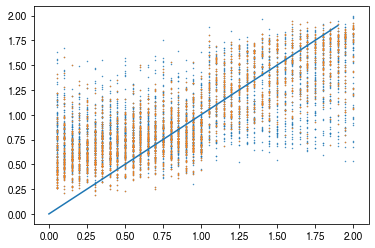

In [46]:
xx=np.arange(0,2,0.1)
co=ccvv[:,0]>100
plt.scatter(ccvv[:,2],pred_a_t[:,0],s=0.2)
plt.plot(xx,xx)
plt.scatter(ccvv[co,2],pred_a_t[co,0],s=0.2)


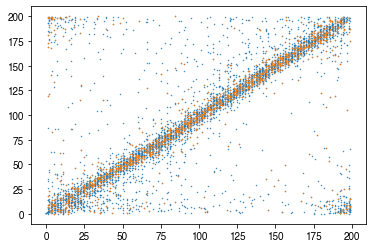

In [48]:
xx=np.arange(0,2,0.1)
co=np.abs(ccvv[:,2]-ccvv[:,4])>0.8
plt.scatter(ccvv[:,0],pr_t,s=0.2)
plt.plot(xx,xx)
plt.scatter(ccvv[co,0],pr_t[co],s=0.2)

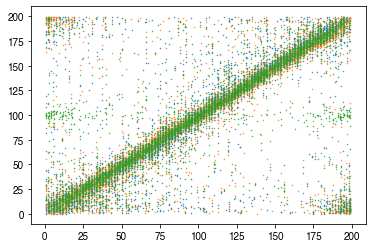

In [23]:
xx=np.arange(0,2,0.1)
plt.scatter(ccvv[:,0],pr_t,s=0.2)
plt.scatter(ccvv[:,0],pr_t_rev,s=0.2)
plt.scatter(ccvv[:,0],pr_t_com,s=0.2)




In [67]:
pr

array([ 1.5371083 ,  0.49222165, -0.9088347 , -0.4035557 ], dtype=float32)

In [68]:
tt

137

In [69]:
my_atan(pr[2],pr[3])*200/(2*np.pi)

136.69835318745544

In [72]:
np.std(traj[:tt])

10.992775177070529

In [111]:
#predicting the models using a newtork trained for classification on trajectories of length 100 
#applied to the trajectories split according to the predicted change point
#In addition estimate a1 and a2 using the network trained for task 1
pred_m1=[] #predictions in terms of [0,0,0,1,0]
pred_m1s=[]#predictions in terms of 3
pred_a1=[] #predictions on a1 made by network for task 1
pred_a1b=[] #predictions on a1 made by network for task 1 with net trained better and for 125 

pred_m2=[]
pred_m2s=[]
pred_a2=[]
pred_a2b=[]

st=5 #number of data points passed to the network as 1 timestper 
j=0
validation=bbv[200]
for traj in validation:
#     test_tim_step=np.arange(len(traj))
#     show_time_coll=np.tile(test_tim_step,(1,1))
#     data_show,label_show,traj_show,times_show=data_split(np.asarray(traj).reshape(1,len(traj),),
#                                                      show_time_coll,
#                                                          labels=ccl,
#                                                          start_row=0,num_row=len(validation),
#                                                          traj_len=i,n_in=0,n_samples=1,
#                                                          p_p=1,hmin=0,hmax=2,limith=False,normalization=True)
#     pr1=model_switch_a_t.predict(data_show).flatten()
#     print(pr1)
    pr=pred_a_t[j].flatten()
#    print(pr)
    tt=np.max((int(np.round(my_atan(pr[2],pr[3])*200/(2*np.pi))),1))
    tt=np.min((tt,199))
    
    
    #define the first segment as the traj up to the predicted switching point
        
    traj1=traj[:tt]
    #normalize it
    traj1=(traj1-np.mean(traj1))/np.max((np.std(traj1),1))
    #reshape so that the network can take it as input 
    traj1=np.asarray(traj1).reshape(1,len(traj1),1)
    ttb=int(tt/st)*st
    
    
    #predicting the model of seg 1
    pr1=model_classi_norm_100.predict(traj1).flatten()
    pred_m1.append(pr1)
    pred_m1s.append(np.argmax(pr1))
    
    #inferring the exponent of seg 1, a1
    pred_a1.append(model_norm_short.predict(traj1).flatten())
    if ttb==0:
            pred_a1b.append(np.array([np.random.uniform(0,2)]))
    else:
        
        traj1b=traj1[:,:ttb,:].reshape(1,-1,st)
        pred_a1b.append(model_norm_125.predict(traj1b).flatten())

    
    #REPEAT FOR SECOND SEGMENT
    traj2=traj[tt:]
    traj2=(traj2-np.mean(traj2))/np.max((np.std(traj2),1))
    traj2=np.asarray(traj2).reshape(1,len(traj2),1)
    pr2=model_classi_norm_100.predict(traj2).flatten()

    pred_m2s.append(np.argmax(pr2))
    pred_m2.append(pr2)
    
    pred_a2.append(model_norm_short.predict(traj2).flatten())
    
    if (len(traj)-ttb-st)<5:
        
        pred_a2b.append(np.array([np.random.uniform(0,2)]))

    else:
        
        traj2b=traj2[:,-(len(traj)-ttb-st):,:].reshape(1,-1,st) 
        pred_a2b.append(model_norm_125.predict(traj2b).flatten())



    #    print(j)
    j=j+1
print(pred_a1)
print(pred_a1.shape)
pred_a2=np.asarray(pred_a2).flatten()
pred_a1=np.asarray(pred_a1).flatten()
pred_a1b=np.asarray(pred_a1b).flatten()
pred_a2b=np.asarray(pred_a2b).flatten()



[array([1.2747068], dtype=float32), array([1.1932565], dtype=float32), array([1.7900275], dtype=float32), array([0.18223317], dtype=float32), array([0.8178468], dtype=float32), array([0.9604476], dtype=float32), array([1.805476], dtype=float32), array([1.5448841], dtype=float32), array([1.7136635], dtype=float32), array([1.8308432], dtype=float32), array([0.46576917], dtype=float32), array([0.85664165], dtype=float32), array([2.0794418], dtype=float32), array([0.56216186], dtype=float32), array([0.2961746], dtype=float32), array([2.1536436], dtype=float32), array([1.3864082], dtype=float32), array([0.65986514], dtype=float32), array([0.49811178], dtype=float32), array([1.7258857], dtype=float32), array([1.4020747], dtype=float32), array([0.33696213], dtype=float32), array([1.4026343], dtype=float32), array([1.9054707], dtype=float32), array([0.37953088], dtype=float32), array([1.6679752], dtype=float32), array([1.1741035], dtype=float32), array([0.22281203], dtype=float32), array([0.71

AttributeError: 'list' object has no attribute 'shape'

In [84]:
model_norm_125.predict(traj2b).flatten().flatten()

array([0.35164043], dtype=float32)

In [65]:
traj1.shape

(1, 1, 1)

In [55]:
traj1[:,:ttb,:].reshape(1,-1,st)

ValueError: cannot reshape array of size 1 into shape (1,newaxis,5)

In [48]:
len(traj[-(len(traj)-135-5):])

60

In [40]:
traj1b=traj1[:,:135,:].reshape(1,-1,5)


In [43]:
traj1[0,:10,:]

array([[2.16278987],
       [2.03693535],
       [2.09013866],
       [2.01664594],
       [1.85500973],
       [1.77080425],
       [1.66194851],
       [1.46117817],
       [1.65812801],
       [1.41616024]])

In [42]:
traj1b[0,:2,:]

array([[2.16278987, 2.03693535, 2.09013866, 2.01664594, 1.85500973],
       [1.77080425, 1.66194851, 1.46117817, 1.65812801, 1.41616024]])

In [100]:
np.asarray(pred_a1b).flatten()-ccvv[:,2]

array([-0.30722075,  1.18254468, -0.27381778, ..., -0.0718337 ,
        0.69703805,  0.23580092])

In [106]:
np.asarray(pred_a1).flatten()-ccvv[:,2]

array([-0.52529316,  1.72373209, -0.274176  , ...,  0.3751049 ,
        1.27097225,  0.17949777])

In [109]:
np.asarray(pred_a1).flatten()

array([1.2747068 , 2.123732  , 1.725824  , ..., 0.8751049 , 2.2709723 ,
       0.27949777], dtype=float32)

In [110]:
ccvv[:,2]

array([1.8, 0.4, 2. , ..., 0.5, 1. , 0.1])

In [107]:
pred_a1-ccvv[:,2]

array([[-0.52529316,  0.87470684, -0.72529316, ...,  0.77470684,
         0.27470684,  1.17470684],
       [ 0.32373209,  1.72373209,  0.12373209, ...,  1.62373209,
         1.12373209,  2.02373209],
       [-0.074176  ,  1.325824  , -0.274176  , ...,  1.225824  ,
         0.725824  ,  1.625824  ],
       ...,
       [-0.9248951 ,  0.4751049 , -1.1248951 , ...,  0.3751049 ,
        -0.1248951 ,  0.7751049 ],
       [ 0.47097225,  1.87097225,  0.27097225, ...,  1.77097225,
         1.27097225,  2.17097225],
       [-1.52050223, -0.12050223, -1.72050223, ..., -0.22050223,
        -0.72050223,  0.17949777]])

In [103]:
(pred_a1b-ccvv[:,2]).flatten()

array([-0.30722075,  1.09277925, -0.50722075, ..., -0.16419908,
       -0.66419908,  0.23580092])

Before looking into the classification part let's see how inferring the exponent using the network trained for task 1 performs on the segments of the length predicted by the new network

In [105]:
ma1=np.mean(np.abs(pred_a_t[:,0]-ccvv[:,2]))
ma1_seg=np.mean(np.abs(np.asarray(pred_a1).flatten()-ccvv[:,2]))
ma1b_seg=np.mean(np.abs(np.asarray(pred_a1b).flatten()-ccvv[:,2]))

pred_a1_comb=(pred_a_t[:,0]+np.asarray(pred_a1).flatten())/2
ma1_comb=np.mean(np.abs(pred_a1_comb-ccvv[:,2]))

pred_a1b_comb=(pred_a_t[:,0]+np.asarray(pred_a1b).flatten())/2
ma1b_comb=np.mean(np.abs(pred_a1b_comb-ccvv[:,2]))

print('MAE for a1 using network for joint inference=',ma1,'\n',
      'using net for task 1 on predicted segment',ma1_seg,'\n',
      'using net for task 1 with 125 on predicted segment',ma1b_seg,'\n',
      'combining the two methods', ma1_comb,'\n',
      'combining the two methods using 125', ma1b_comb)

MAE for a1 using network for joint inference= 0.32020688773989675 
 using net for task 1 on predicted segment 0.535579893309176 
 using net for task 1 with 125 on predicted segment 0.3878219511914253 
 combining the two methods 0.3929349289000034 
 combining the two methods using 125 0.3290708254182339


In [32]:
ma2=np.mean(np.abs(pred_a_t[:,1]-ccvv[:,4]))
ma2_seg=np.mean(np.abs(np.asarray(pred_a2).flatten()-ccvv[:,4]))
pred_a2_comb=(pred_a_t[:,1]+np.asarray(pred_a2).flatten())/2
ma2_comb=np.mean(np.abs(pred_a2_comb-ccvv[:,4]))


print('MAE for a2 using network for joint inference =',ma2,'\n',
      'using net for task 1 on predicted segment',ma2_seg,'\n',
      'combining the two methods', ma2_comb)

MAE for a2 using new network= 0.3150426671200991 
 using task 1 on predicted segment 0.4328953334385156 
 combining the two methods 0.6114219553589821


Applying the network trained for task 1 on the predicted segments seems to perform very poorly. It could be due to the fact that I'm using the net trained in traj of length 25. Let's take a closer look

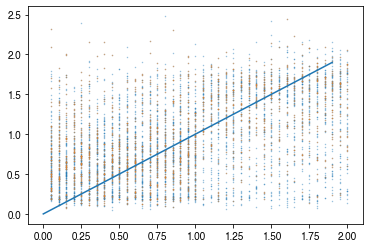

In [42]:
xx=np.arange(0,2,0.1)
co=((ccvv[:,0]>100)& (ccvv[:,0]<170))
plt.scatter(ccvv[:,2],pred_a1,s=0.2,alpha=0.5)
plt.plot(xx,xx)
plt.scatter(ccvv[co,2],pred_a1[co],s=0.2,alpha=0.5)


Comparing the two methods on all tasks

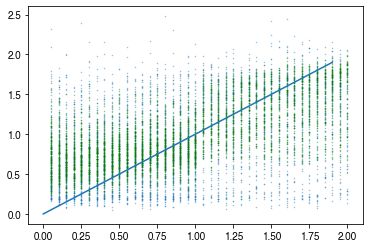

In [43]:
xx=np.arange(0,2,0.1)
co=((ccvv[:,0]>100))# & (ccvv[:,0]<170))
plt.scatter(ccvv[:,2],pred_a1,s=0.2,alpha=0.5)
plt.plot(xx,xx)
plt.scatter(ccvv[:,2],pred_a_t[:,0],s=0.2,alpha=0.5,color='g')


Comparing the two methods on 'easy tasks' of length 50<l<150

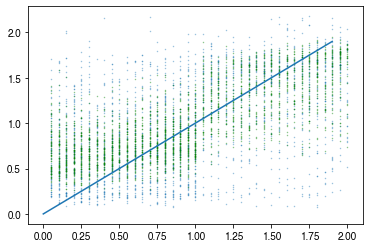

In [45]:
xx=np.arange(0,2,0.1)
co=((ccvv[:,0]>50)& (ccvv[:,0]<150))
plt.scatter(ccvv[co,2],pred_a1[co],s=0.2,alpha=0.5)
plt.plot(xx,xx)
plt.scatter(ccvv[co,2],pred_a_t[co,0],s=0.2,alpha=0.5,color='g')


In [36]:
ccvv[co,2]

array([1.8 , 2.  , 0.5 , ..., 0.05, 0.6 , 0.5 ])

In [96]:
np.max(np.argmax(np.asarray(pred_m2),1)-pred_m2s)

0

In [ ]:
pred_to_txt = np.ones((len(predictions), 6))
for i in range(len(predictions)):
    for j in range(5):
        
        pred_to_txt[i, j+1] = predictions[i][j]

np.savetxt('task3.txt', pred_to_txt.astype(float), fmt = '%1.5f', delimiter = ';')

In [98]:
#assembling the total prediction array now giving (t,model 1,a1,model2,a2)
pred_tot=np.zeros((len(validation),5))
pred_tot[:,0]=my_atan(pred_a_t[:,2],pred_a_t[:,3])*200/(2*np.pi)
pred_tot[:,1]=pred_m1s
pred_tot[:,2]=pred_a_t[:,0]
pred_tot[:,3]=pred_m2s
pred_tot[:,4]=pred_a_t[:,1]


In [99]:
pred_tot

array([[1.36698353e+02, 4.00000000e+00, 1.53710830e+00, 1.00000000e+00,
        4.92221653e-01],
       [2.72116539e+01, 4.00000000e+00, 1.08911014e+00, 3.00000000e+00,
        1.56538093e+00],
       [1.28711532e+02, 3.00000000e+00, 1.73084044e+00, 4.00000000e+00,
        7.93013155e-01],
       ...,
       [1.55336152e+02, 0.00000000e+00, 1.02611160e+00, 0.00000000e+00,
        1.00705242e+00],
       [9.04633436e+01, 4.00000000e+00, 1.32482696e+00, 3.00000000e+00,
        1.74624407e+00],
       [1.01554033e-01, 0.00000000e+00, 5.12800515e-01, 1.00000000e+00,
        3.50387692e-01]])

In [ ]:
from sklearn.metrics import f1_score
for i in cl:
    groundtruth = np.argmax(ccvm[i], axis = 1)
    test_tim_step=np.arange(i)
    show_time_coll=np.tile(test_tim_step,(len(bbv[i]),1))
    data_show,label_show,traj_show,times_show=data_split(np.asarray(bbv[i]),
                                                             show_time_coll,labels=np.asarray(ccvm[i]),
                                                             start_row=0,num_row=10000,traj_len=i,n_in=0,
                                                             n_samples=1,p_p=1,hmin=0.25,hmax=0.75,
                                                             limith=False,normalization=True)

    predictions = np.argmax(model_classi_norm_chi.predict(traj_show.reshape(len(traj_show),i,1)), axis = 1)

    print(f1_score(groundtruth, predictions, average='micro'))
                            

In [102]:
from sklearn.metrics import f1_score
print("for first segment",f1_score(ccvv[:,1], pred_tot[:,1], average='micro'))
tm=100
co=ccvv[:,0]>tm

print("for first segment using only segments longer than",
      tm,"score is",f1_score(ccvv[co,1], pred_tot[co,1], average='micro'))


for first segment 0.4758
for first segment using only segments longer than 100 score is 0.5214548426644872


In [115]:
#USing the new net

from sklearn.metrics import f1_score
print("for first segment",f1_score(ccvv[:,1], np.argmax(pr_cla_first,axis=1), average='micro'))
# tm=100
# co=ccvv[:,0]>tm

# print("for first segment using only segments longer than",
#       tm,"score is",f1_score(ccvv[co,1], pred_tot[co,1], average='micro'))

for first segment 0.5558


In [121]:
#USing the new net in combination with segmented

from sklearn.metrics import f1_score
print("for first segment",f1_score(ccvv[:,1], np.argmax((pr_cla_first+np.asarray(pred_m1))/2,axis=1), average='micro'))
# tm=100
# co=ccvv[:,0]>tm

# print("for first segment using only segments longer than",
#       tm,"score is",f1_score(ccvv[co,1], pred_tot[co,1], average='micro'))

for first segment 0.5268


In [119]:
np.asarray(pred_m1)

array([[1.2228709e-01, 9.2876631e-05, 8.8257706e-03, 1.0231451e-01,
        7.6647973e-01],
       [2.7171466e-01, 1.2859856e-01, 1.5526849e-01, 9.3054622e-03,
        4.3511283e-01],
       [7.5833846e-08, 1.6856882e-11, 2.5958122e-09, 9.9999702e-01,
        2.8701406e-06],
       ...,
       [5.1111329e-01, 1.2032352e-02, 5.8361631e-02, 8.0087744e-03,
        4.1048405e-01],
       [6.2236048e-02, 5.1648549e-05, 9.8592823e-04, 4.4761818e-02,
        8.9196455e-01],
       [5.2631485e-01, 1.4994124e-01, 4.3800925e-03, 1.7244790e-01,
        1.4691585e-01]], dtype=float32)

In [116]:
pr_cla_first

array([[0.03990713, 0.00449805, 0.37491044, 0.48058268, 0.10010169],
       [0.2571428 , 0.03502807, 0.24710764, 0.08698618, 0.37373522],
       [0.00312083, 0.0014239 , 0.00988547, 0.98345214, 0.00211766],
       ...,
       [0.4625212 , 0.14747813, 0.09911456, 0.01904778, 0.27183837],
       [0.24349204, 0.04794172, 0.28305832, 0.0492105 , 0.37629753],
       [0.2513577 , 0.44029477, 0.15622437, 0.05427776, 0.09784535]],
      dtype=float32)

In [120]:
pr_cla_first-np.asarray(pred_m1)

array([[-0.08237996,  0.00440518,  0.36608467,  0.37826818, -0.666378  ],
       [-0.01457185, -0.09357049,  0.09183915,  0.07768072, -0.06137761],
       [ 0.00312076,  0.0014239 ,  0.00988546, -0.01654488,  0.00211479],
       ...,
       [-0.04859209,  0.13544577,  0.04075293,  0.01103901, -0.13864568],
       [ 0.181256  ,  0.04789007,  0.2820724 ,  0.00444868, -0.515667  ],
       [-0.27495715,  0.29035354,  0.15184428, -0.11817015, -0.04907051]],
      dtype=float32)

In [104]:
from sklearn.metrics import f1_score
print("for second segment",f1_score(ccvv[:,3], pred_tot[:,3], average='micro'))
tm=100
co=ccvv[:,0]<tm

print("for second segment using only segments longer than",
      tm,"score is",f1_score(ccvv[co,3], pred_tot[co,3], average='micro'))


for second segment 0.4776
for second segment using only segments longer than 100 score is 0.5324110671936759


Very poor performance!!

In [105]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(ccvv[:,3],pred_tot[:,3])

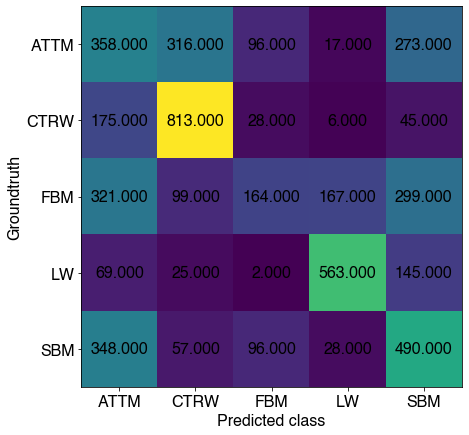

In [106]:
fig, ax = plt.subplots(figsize = (7,7))
ax.matshow(conf)
for (i, j), z in np.ndenumerate(conf):
    ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center', fontsize = 16)
ax.set_xticklabels(['c','ATTM','CTRW','FBM','LW','SBM'], fontsize = 16)
ax.set_yticklabels(['a','ATTM','CTRW','FBM','LW','SBM'], fontsize = 16)
ax.set_xlabel('Predicted class', fontsize = 16)
ax.set_ylabel('Groundtruth', fontsize = 16)
ax.xaxis.set_ticks_position('bottom') 

# FOR SUMBISSION

In [141]:
import csv
trajs_from_files = csv.reader(open('validation_for_scoring/task3.txt','r'), delimiter=';', 
                                        lineterminator='\n',quoting=csv.QUOTE_NONNUMERIC)
validation = [[],[],[]]
for trajs in enumerate(trajs_from_files):
    validation[int(trajs[1][0])-1].append(trajs[1][1:])

In [115]:
len(validation[0])

10000

In [142]:
#for 1d
i=200
validation=validation[0]
test_tim_step=np.arange(200)
show_time_coll=np.tile(test_tim_step,(len(validation),1))
data_show,label_show,traj_show,times_show=data_split(np.asarray(validation),
                                                     show_time_coll,
                                                         labels=cclv,
                                                         start_row=0,num_row=len(validation),
                                                         traj_len=np.asarray(validation).shape[1],n_in=0,n_samples=1,
                                                         p_p=1,hmin=0,hmax=2,limith=False,normalization=True)
pred_a_t=model_switch_a_t.predict(data_show)

n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 200 final_point= 200 data length 200


In [140]:
len(pred_m1s)

5000

In [143]:
#predicting the models using a newtork trained for classification on trajectories of length 100 
#applied to the trajectories split according to the predicted change point
pred_m1=[] #predictions in terms of [0,0,0,1,0]
pred_m1s=[]#predictions in terms of 3

pred_m2=[]
pred_m2s=[]
j=0
for traj in validation:
#     test_tim_step=np.arange(len(traj))
#     show_time_coll=np.tile(test_tim_step,(1,1))
#     data_show,label_show,traj_show,times_show=data_split(np.asarray(traj).reshape(1,len(traj),),
#                                                      show_time_coll,
#                                                          labels=ccl,
#                                                          start_row=0,num_row=len(validation),
#                                                          traj_len=i,n_in=0,n_samples=1,
#                                                          p_p=1,hmin=0,hmax=2,limith=False,normalization=True)
#     pr1=model_switch_a_t.predict(data_show).flatten()
#     print(pr1)
    pr=pred_a_t[j].flatten()
#    print(pr)
    tt=np.max((int(np.round(my_atan(pr[2],pr[3])*200/(2*np.pi))),1))
    tt=np.min((tt,199))

    #print(tt)
    traj1=traj[:tt]
    traj1=(traj1-np.mean(traj1))/np.max((np.std(traj1),1))
    #print(np.mean(traj),np.std(traj))
    pr1=model_classi_norm_100.predict(np.asarray(traj1).reshape(1,len(traj1),1)).flatten()
    pred_m1.append(pr1)
    pred_m1s.append(np.argmax(pr1))

    traj2=traj[tt:]
    traj2=(traj2-np.mean(traj2))/np.max((np.std(traj2),1))
    #print(np.mean(traj),np.std(traj))
    pr2=model_classi_norm_100.predict(np.asarray(traj2).reshape(1,len(traj2),1)).flatten()

    pred_m2s.append(np.argmax(pr2))
    pred_m2.append(pr2)

    #    print(j)
    j=j+1

In [144]:
#assembling the total prediction array now giving (t,model 1,a1,model2,a2)
predictions=np.zeros((len(validation),5))
predictions[:,0]=my_atan(pred_a_t[:,2],pred_a_t[:,3])*200/(2*np.pi)
predictions[:,1]=pred_m1s
predictions[:,2]=pred_a_t[:,0]
predictions[:,3]=pred_m2s
predictions[:,4]=pred_a_t[:,1]

In [146]:
len(predictions[0])

5

In [147]:
predictions[0][4]

0.9102641940116882

In [149]:
pred_to_txt = np.ones((len(predictions), 6))
for i in range(len(predictions)):
    for j in range(5):
        
        pred_to_txt[i, j+1] = predictions[i][j]

np.savetxt('task3.txt', pred_to_txt.astype(float), fmt = '%1.5f', delimiter = ';')

In [ ]:
model_classi_norm_chi.save('task2_1d_classi_norm_chi.h5')


# Training 2 different nets for models of segments

In [9]:
#LTSM network for learning  the Hurst exponet H, Normalized trajectories!!!

#Building the network
model_classi_first = Sequential()
#first layer: LSTM of dimension 64
model_classi_first.add(LSTM(64,
                return_sequences=True,
                dropout=0,
                recurrent_dropout=0,
                input_shape=(None, 2)
                ))

#second layer: LSTM of dimension 16
model_classi_first.add(LSTM(16,
                dropout=0,
                recurrent_dropout=0))
#Last layer, fully connected
model_classi_first.add(Dense(5))
model_classi_first.add(Dense(5,activation= 'softmax'))

model_classi_first.compile(optimizer='adam',
                loss='binary_crossentropy', 
                metrics=['accuracy'])

#Printing a summary of the built network
model_classi_first.summary()

#Training the network first with minibatches of size 32 for 10 epochs, 
#then with minibatches of size 128
    



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 64)          17152     
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                5184      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 85        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
Total params: 22,451
Trainable params: 22,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
np.asarray(cc[200])[:,1]

In [ ]:
len(cc[200])

In [ ]:
cc[200][2]

In [10]:
i=200
j=0
ccf=np.zeros((len(cc[200]),5)) #label for model of first segment
ccs=np.zeros((len(cc[200]),5)) #label for model of second segment


#ccv=np.asarray(cc[200])
#ss=np.shape(ccv)
for j in range(len(cc[200])):
    ccf[j,int(cc[i][j][1])]=1
    ccs[j,int(cc[i][j][3])]=1

In [ ]:
ccf

In [ ]:
ccs

In [ ]:

#Training
i=200
#[32, 128]:
   
   
    

test_tim_step=np.arange(i)
show_time_coll=np.tile(test_tim_step,(len(bb[i]),1))
data_show,label_show,traj_show,times_show=data_split(np.asarray(bb[i]),
                                                     show_time_coll,
                                                         labels=ccf,
                                                         start_row=0,num_row=len(bb[i]),
                                                         traj_len=i,n_in=0,n_samples=1,
                                                         p_p=1,hmin=0,hmax=2,limith=False,normalization=True)
for batch_size in [32,128]:
    history_classi_first =model_classi_first.fit(data_show, 
                        label_show,validation_split=0.2,
                        epochs=10-int(i/200), 
                        batch_size=batch_size,
                        shuffle=True)
    model_classi_first.save('task3_classi_first.h5')


    

n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 200 final_point= 200 data length 200
Train on 80000 samples, validate on 20000 samples
Epoch 1/9
22784/80000 [=======>......................] - ETA: 17:21 - loss: 0.4990 - accuracy: 0.8000

Training the network for the second segment

In [ ]:
#LTSM network for learning  the Hurst exponet H, Normalized trajectories!!!

#Building the network
model_classi_sec = Sequential()
#sec layer: LSTM of dimension 64
model_classi_sec.add(LSTM(64,
                return_sequences=True,
                dropout=0,
                recurrent_dropout=0,
                input_shape=(None, 2)
                ))

#second layer: LSTM of dimension 16
model_classi_sec.add(LSTM(16,
                dropout=0,
                recurrent_dropout=0))
#Last layer, fully connected
model_classi_sec.add(Dense(5))
model_classi_sec.add(Dense(5,activation= 'softmax'))

model_classi_sec.compile(optimizer='adam',
                loss='binary_crossentropy', 
                metrics=['accuracy'])

#Printing a summary of the built network
model_classi_sec.summary()

#Training the network sec with minibatches of size 32 for 10 epochs, 
#then with minibatches of size 128
    



In [ ]:

#Training
i=200
#[32, 128]:
   
   
    

test_tim_step=np.arange(i)
show_time_coll=np.tile(test_tim_step,(len(bb[i]),1))
data_show,label_show,traj_show,times_show=data_split(np.asarray(bb[i]),
                                                     show_time_coll,
                                                         labels=ccs,
                                                         start_row=0,num_row=len(bb[i]),
                                                         traj_len=i,n_in=0,n_samples=1,
                                                         p_p=1,hmin=0,hmax=2,limith=False,normalization=True)
for batch_size in [32,128]:
    history_classi_second =model_classi_sec.fit(data_show, 
                        label_show,validation_split=0.2,
                        epochs=10-int(i/200), 
                        batch_size=batch_size,
                        shuffle=True)
    model_classi_sec.save('task3_classi_second.h5')




Inference of the model of the first and second segment using the two newtorks

In [ ]:
validation=bbv[200]
test_tim_step=np.arange(200)
show_time_coll=np.tile(test_tim_step,(len(validation),1))
data_show,label_show,traj_show,times_show=data_split(np.asarray(validation),
                                                     show_time_coll,
                                                         labels=ccl,
                                                         start_row=0,num_row=len(validation),
                                                         traj_len=i,n_in=0,n_samples=1,
                                                         p_p=1,hmin=0,hmax=2,limith=False,normalization=True)
pred_m1_first=np.argmax(model_classi_first.predict(data_show),axis=1)
pred_m2_sec=np.argmax(model_classi_sec.predict(data_show),axis=1)

In [ ]:
pred_m1_first

In [ ]:
np.argmax(pred_m1_first,axis=1)

In [ ]:
model_classi_sec.save('/Users/stefabo/Nextcloud/task3_classi_second.h5')

In [ ]:
model_classi_first.save('/Users/stefabo/Nextcloud/task3_classi_first.h5')

In [ ]:
model_switch_a_t.save('/Users/stefabo/Nextcloud/task3_a_t.h5')

# check performance of new net for classification of model 2

In [6]:
final_model_classi_sec = tf.keras.models.load_model('taks_3_classify_second_checkout200.h5')
final_model_classi_first = tf.keras.models.load_model('taks_3_classify_frst_checkout200.h5')

In [46]:
model_classi_sec = tf.keras.models.load_model('task3_classi_second.h5')

In [8]:
validation=bbv[200]
test_tim_step=np.arange(200)
show_time_coll=np.tile(test_tim_step,(len(validation),1))
# data_show,label_show,traj_show,times_show=data_split(np.asarray(validation),
#                                                      show_time_coll,
#                                                          labels=np.ones(len(validation)),
#                                                          start_row=0,num_row=len(validation),
#                                                          traj_len=i,n_in=0,n_samples=1,
#                                                          p_p=1,hmin=0,hmax=2,limith=False,normalization=True)
#pred_m1_first=np.argmax(model_classi_first.predict(data_show),axis=1)
#pred_m2_sec=np.argmax(model_classi_sec.predict(data_show),axis=1)
data_show,label_show,traj_show,times_show=data_split(np.diff(np.asarray(validation),axis=1),
                                                     show_time_coll,
                                                         labels=np.ones(len(validation)),
                                                         start_row=0,num_row=len(validation),
                                                         traj_len=i-1,n_in=0,n_samples=1,
                                                         p_p=1,hmin=0,hmax=2,limith=False,normalization=True)

#new_pred_m2_sec=np.argmax(new_model_classi_sec.predict(traj_show.reshape(-1,i-1,1)),axis=1)
final_pred_m2_sec=np.argmax(final_model_classi_sec.predict(data_show),axis=1)
final_pred_m1_first=np.argmax(final_model_classi_first.predict(data_show),axis=1)


In [10]:
ccv[200][2]

[20.0, 1.0, 0.15, 1.0, 0.55]

In [58]:
ccv[200][2]

array([ 1.  , 20.  ,  1.  ,  0.15,  1.  ,  0.55])

In [11]:
lab_mod_sec = np.asarray(ccv[200])[:,3]
lab_mod_first = np.asarray(ccv[200])[:,1]

In [62]:
pred_m2_sec

array([1, 2, 1, ..., 4, 1, 4])

In [63]:

from sklearn.metrics import f1_score
print("for old method",f1_score(lab_mod_sec, pred_m2_sec, average='micro'))

print("for new method",
      f1_score(lab_mod_sec, new_pred_m2_sec, average='micro'))


for old method 0.5726
for new method 0.597


In [14]:
from sklearn.metrics import f1_score
print("final method first",f1_score(lab_mod_first, final_pred_m1_first, average='micro'))

print("final method second",
      f1_score(lab_mod_sec, final_pred_m2_sec, average='micro'))


final method first 0.6738
final method second 0.6148


How about using the nets trained for task 2 on the second segment?

In [7]:
model_switch_a_t_new = load_model('task3_new.h5')

model_switch_a_t_diff = load_model('diff_task3.h5')

model_switch_a_t_diff_new = load_model('taks_3_inference_200_new.h5')

In [7]:
# net_centers2d_classi=[25,125, 225,425]
# meta_model2d_classi=[]
# for i in net_centers2d_classi: #NB I should go the whole way to 925 and use 25 and 60
#     m=load_model('/Users/stefabo/Documents/GitHub/eduRNN/task2/2d/task2_2D_checkpoint_'+str(i)+'.h5')
#     #m=tf.keras.models.load_model('Model_1D_recdout_'+str(i)+'.h5')


#     meta_model2d_classi.append(m)
  

In [4]:
net_centers1d=[25,65,125, 225,425,825]
meta_model1d=[]
for i in net_centers1d: #NB I should go the whole way to 925 and use 25 and 60
    m=load_model('/Users/stefabo/Documents/GitHub/eduRNN/task2/1d/Task2_1D_recdout_'+str(i)+'.h5')
    #m=tf.keras.models.load_model('Model_1D_recdout_'+str(i)+'.h5')


    meta_model1d.append(m)
 

In [6]:
#using the net new to infer 
#for 1d
i=200
validation1d=bbv[200]
test_tim_step=np.arange(200)
show_time_coll=np.tile(test_tim_step,(len(validation1d),1))
data_show,label_show,traj_show,times_show=data_split(np.asarray(validation1d),
                                                     show_time_coll,
                                                         labels=np.ones(len(validation1d)),
                                                         start_row=0,num_row=len(validation1d),
                                                         traj_len=np.asarray(validation1d).shape[1],n_in=0,n_samples=1,
                                                         p_p=1,hmin=0,hmax=2,limith=False,normalization=True)
                                                     
# pred_a_t=model_switch_a_t.predict(data_show)
# pred_a_t_int=model_switch_a_t_int(data_show)
pred_a_t_new=model_switch_a_t_new(data_show)


In [10]:
#Estimating the exponents and switching point using diff
i=200

data_show_diff,label_show,traj_show,times_show=data_split(np.diff(np.asarray(validation1d),axis=1),
                                                     show_time_coll,
                                                         labels=np.ones(len(validation1d)),
                                                         start_row=0,num_row=len(validation1d),
                                                         traj_len=i-1,n_in=0,n_samples=1,
                                                         p_p=1,hmin=0,hmax=2,limith=False,normalization=True)
pred_a_t_diff=model_switch_a_t_diff.predict(data_show_diff)
pred_a_t_diff_new=model_switch_a_t_diff_new.predict(data_show_diff)

In [13]:
#combining predictions for the switching time
pr_t_new = my_atan(pred_a_t_new[:,2],pred_a_t_new[:,3])*200/(2*np.pi)

pr_t_diff = my_atan(pred_a_t_diff[:,2],pred_a_t_diff[:,3])*200/(2*np.pi)

pr_t_diff_new = my_atan(pred_a_t_diff_new[:,2],pred_a_t_diff_new[:,3])*200/(2*np.pi)



pr_t_comb = (pr_t_new+pr_t_diff)/2

pr_t_comb_new = (pr_t_new+pr_t_diff_new)/2



In [ ]:
 'MAE for a2 using diff combined with new=',ma2_com,'\n'
      'MAE for a2 using diff new combined with new=',ma2_com2,'\n'
     'MAE for a2 using diff new combined with diff old=',ma2_com3)


In [21]:
ma1=np.mean(np.abs(pred_a_t_new[:,0]-ccvv[:,2]))
ma1_diff=np.mean(np.abs(pred_a_t_diff[:,0]-ccvv[:,2]))
ma1_diff_new=np.mean(np.abs(pred_a_t_diff_new[:,0]-ccvv[:,2]))

ma1_com=np.mean(np.abs((pred_a_t_diff[:,0]+pred_a_t_new[:,0])/2-ccvv[:,2]))



ma1_com2=np.mean(np.abs((pred_a_t_diff_new[:,0]+pred_a_t_new[:,0])/2-ccvv[:,2]))


ma1_com3=np.mean(np.abs((pred_a_t_diff_new[:,0]+pred_a_t_diff[:,0])/2-ccvv[:,2]))

mega_comb1=np.mean(np.abs((pred_a_t_diff_new[:,0]+pred_a_t_diff[:,0]+pred_a_t_new[:,0])/3-ccvv[:,2]))

print('MAE for a1=',ma1,'\n',
     'MAE for a1 using diff old=',ma1_diff,'\n',
     'MAE for a1 using diff new=',ma1_diff_new,'\n'
      'MAE for a1 using diff combined with new=',ma1_com,'\n'
      'MAE for a1 using diff new combined with new=',ma1_com2,'\n'
     'MAE for a1 using diff new combined with diff old=',ma1_com3,'\n'
     'MAE for a1 combining all=',mega_comb1)

ma2=np.mean(np.abs(pred_a_t_new[:,1]-ccvv[:,4]))
ma2_diff=np.mean(np.abs(pred_a_t_diff[:,1]-ccvv[:,4]))
ma2_diff_new=np.mean(np.abs(pred_a_t_diff_new[:,1]-ccvv[:,4]))

ma2_com=np.mean(np.abs((pred_a_t_diff[:,1]+pred_a_t_new[:,1])/2-ccvv[:,4]))



ma2_com2=np.mean(np.abs((pred_a_t_diff_new[:,1]+pred_a_t_new[:,1])/2-ccvv[:,4]))


ma2_com3=np.mean(np.abs((pred_a_t_diff_new[:,1]+pred_a_t_diff[:,1])/2-ccvv[:,4]))
print('MAE for a2=',ma2,'\n',
     'MAE for a2 using diff old=',ma2_diff,'\n',
     'MAE for a2 using diff new=',ma2_diff_new,'\n' 
      'MAE for a2 using diff combined with new=',ma2_com,'\n'
      'MAE for a2 using diff new combined with new=',ma2_com2,'\n'
     'MAE for a2 using diff new combined with diff old=',ma2_com3)


MAE for a1= 0.27416408 
 MAE for a1 using diff old= 0.27967810590982434 
 MAE for a1 using diff new= 0.28142901767373085 
MAE for a1 using diff combined with new= 0.27170023 
MAE for a1 using diff new combined with new= 0.27265579 
MAE for a1 using diff new combined with diff old= 0.27786223351061345 
MAE for a1 combining all= 0.27267787
MAE for a2= 0.2944335 
 MAE for a2 using diff old= 0.30219648411870004 
 MAE for a2 using diff new= 0.3023296813571453 
MAE for a2 using diff combined with new= 0.2945672 
MAE for a2 using diff new combined with new= 0.29477963 
MAE for a2 using diff new combined with diff old= 0.30056929135024546


In [22]:
mt=np.mean(np.abs(pr_t_new-ccvv[:,0]))
rmse=np.sqrt(np.mean((pr_t_new-ccvv[:,0])**2))

mt_diff=np.mean(np.abs(pr_t_diff-ccvv[:,0]))
rmse_diff=np.sqrt(np.mean((pr_t_diff-ccvv[:,0])**2))

mt_diff_new=np.mean(np.abs(pr_t_diff_new-ccvv[:,0]))
rmse_diff_new=np.sqrt(np.mean((pr_t_diff_new-ccvv[:,0])**2))

pr_t_com=(pr_t_diff+pr_t_new)/2
mt_com=np.mean(np.abs(pr_t_com-ccvv[:,0]))
rmse_com=np.sqrt(np.mean((pr_t_com-ccvv[:,0])**2))

pr_t_com2=(pr_t_diff_new+pr_t_new)/2
mt_com2=np.mean(np.abs(pr_t_com2-ccvv[:,0]))
rmse_com2=np.sqrt(np.mean((pr_t_com2-ccvv[:,0])**2))

pr_t_com3=(pr_t_diff_new+pr_t_diff)/2
mt_com3=np.mean(np.abs(pr_t_com3-ccvv[:,0]))
rmse_com3=np.sqrt(np.mean((pr_t_com3-ccvv[:,0])**2))


pr_t_com_mega=(pr_t_diff_new+pr_t_diff+pr_t_new)/3
mt_com_mega=np.mean(np.abs(pr_t_com_mega-ccvv[:,0]))
rmse_com_mega=np.sqrt(np.mean((pr_t_com_mega-ccvv[:,0])**2))

print('MAE for t=',mt, 'RMSE for t=',rmse)
print('MAE for t using diff=',mt_diff, 'RMSE for t using diff=',rmse_diff)
print('MAE for t using diff new=',mt_diff_new, 'RMSE for t using diff=',rmse_diff_new)

print('MAE for t using combination of new and diff=',mt_com, 'RMSE for t using com=',rmse_com)
print('MAE for t using combination of new and diff_new=',mt_com2, 'RMSE for t using com=',rmse_com2)
print('MAE for t using combination of diff and diff_new=',mt_com3, 'RMSE for t using com=',rmse_com3)
print('MAE for t combining all=',
      mt_com_mega, 'RMSE for t using com=',rmse_com_mega)

MAE for t= 15.555491030628737 RMSE for t= 41.556675343612895
MAE for t using diff= 13.867015454557759 RMSE for t using diff= 37.88582300861319
MAE for t using diff new= 14.542122779707034 RMSE for t using diff= 38.640943475304496
MAE for t using combination of new and diff= 13.75706814437694 RMSE for t using com= 35.5889236942213
MAE for t using combination of new and diff_new= 14.139093578785577 RMSE for t using com= 35.938118274407394
MAE for t using combination of diff and diff_new= 13.373653819829482 RMSE for t using com= 35.30721570709967
MAE for t combining all= 13.422119973183674 RMSE for t using com= 34.259567844307185


In [ ]:

print('MAE for t using combination of diff and diff_new=',mt_com3, 'RMSE for t using com=',rmse_com3)

In [10]:
pr_t_comb

array([ 13.2125641 ,  43.01013188,  25.69719036, ..., 132.74333594,
        21.37269024,  64.50249273])

In [11]:
#predicting the models using a newtork trained for classification on trajectories of length 100 
#applied to the trajectories split according to the predicted change point
#In addition estimate a1 and a2 using the network trained for task 1
pred_m1=[] #predictions in terms of [0,0,0,1,0]
pred_m1s=[]#predictions in terms of 3
pred_a1=[] #predictions on a1 made by network for task 1
pred_a1b=[] #predictions on a1 made by network for task 1 with net trained better and for 125 

pred_m2=[]
pred_m2s=[]
pred_a2=[]
pred_a2b=[]

st=5 #number of data points passed to the network as 1 timestper 
j=0
validation=bbv[200]
for traj in validation:
    print(j,'\n')
#     test_tim_step=np.arange(len(traj))
#     show_time_coll=np.tile(test_tim_step,(1,1))
#     data_show,label_show,traj_show,times_show=data_split(np.asarray(traj).reshape(1,len(traj),),
#                                                      show_time_coll,
#                                                          labels=ccl,
#                                                          start_row=0,num_row=len(validation),
#                                                          traj_len=i,n_in=0,n_samples=1,
#                                                          p_p=1,hmin=0,hmax=2,limith=False,normalization=True)
#     pr1=model_switch_a_t.predict(data_show).flatten()
#     print(pr1)
    pr=pr_t_comb[j]
#    print(pr)
    tt=np.max((int(np.round(pr)),2))
    tt=np.min((tt,197))
    print(tt,'\n')
    
    
    #define the first segment as the traj up to the predicted switching point
        
#     traj1=traj[:tt]
#     #normalize it
#     traj1=(traj1-np.mean(traj1))/np.max((np.std(traj1),1))
#     #reshape so that the network can take it as input 
#     traj1=np.asarray(traj1).reshape(1,len(traj1),1)
#     ttb=int(tt/st)*st
    
    
    #predicting the model of seg 1
#     pr1=model_classi_norm_100.predict(traj1).flatten()
#     pred_m1.append(pr1)
#     pred_m1s.append(np.argmax(pr1))
    
#     #inferring the exponent of seg 1, a1
#     pred_a1.append(model_norm_short.predict(traj1).flatten())
#     if ttb==0:
#             pred_a1b.append(np.array([np.random.uniform(0,2)]))
#     else:
        
#         traj1b=traj1[:,:ttb,:].reshape(1,-1,st)
#         pred_a1b.append(model_norm_125.predict(traj1b).flatten())

    
    #REPEAT FOR SECOND SEGMENT
    traj2=[traj[tt:]]
#     traj2=(traj2-np.mean(traj2))/np.max((np.std(traj2),1))
#     traj2=np.asarray(traj2).reshape(1,len(traj2),1)
    a1, pr2=many_net_odcv_hd(meta_model1d,traj2,
                 centers=net_centers1d,
                 dim=1,thr=1e-12,skip=[],min_tr=0,max_tr=1000)
    pr2=pr2.reshape(1,5)

    pred_m2s.append(np.argmax(pr2,axis=1))
    pred_m2.append(pr2)
    
   # pred_a2.append(model_norm_short.predict(traj2).flatten())
    
#     if (len(traj)-ttb-st)<5:
        
#         pred_a2b.append(np.array([np.random.uniform(0,2)]))

#     else:
        
#         traj2b=traj2[:,-(len(traj)-ttb-st):,:].reshape(1,-1,st) 
#         pred_a2b.append(model_norm_125.predict(traj2b).flatten())



    #    print(j)
    j=j+1
# print(pred_a1)
# print(pred_a1.shape)
# pred_a2=np.asarray(pred_a2).flatten()
# pred_a1=np.asarray(pred_a1).flatten()
# pred_a1b=np.asarray(pred_a1b).flatten()
# pred_a2b=np.asarray(pred_a2b).flatten()



0 

13 

1 aj 1 / 1

43 

2 aj 1 / 1

26 

3 aj 1 / 1

71 

4 aj 1 / 1

90 

5 

118 

6 

38 

7 

127 

8 

169 

9 aj 1 / 1

39 

10 j 1 / 1

129 

11 

114 

12 

134 

13 

48 

14 

183 

15 j 1 / 1

81 



16 

175 

17 

16 

18 

180 

19 j 1 / 1

92 

20 

114 

21 j 1 / 1

101 

22 

184 

23 

91 

24 j 1 / 1

193 

25 

98 

26 

35 



27 

60 

28 

77 

29 

147 

30 

102 

31 

10 

32 

144 

33 

27 

34 j 1 / 1

138 

35 

74 



36 

80 

37 j 1 / 1

162 

38 

142 

39 

54 

40 

73 

41 j 1 / 1

29 

42 

197 

43 

175 

44 j 1 / 1

124 

45 

134 

46 j 1 / 1

2 

47 

196 

48 j 1 / 1

87 



49 

79 

50 

172 

51 

115 

52 j 1 / 1

3 

53 j 1 / 1

40 

54 j 1 / 1

110 

55 

60 

56 j 1 / 1

10 

57 j 1 / 1

18 

58 j 1 / 1

31 

59 j 1 / 1

99 

60 j 1 / 1

57 

61 j 1 / 1

10 

62 j 1 / 1

19 

63 j 1 / 1

102 

64 j 1 / 1

26 

65 j 1 / 1

82 

66 

106 

67 

156 

68 

121 

69 

167 

70 

54 

71 j 1 / 1

3 

72 j 1 / 1

89 



73 

191 

74 

19 

75 j 1 / 1

78 

76 j 1 / 1

48 

77 j 1 / 1

57 

78 j 1 / 1

184 

79 j 1 / 1

126 

80 j 1 / 1

182 

81 j 1 / 1

24 

82 j 1 / 1

108 

83 

138 

84 j 1 / 1

142 

85 j 1 / 1

121 

86 j 1 / 1

23 

87 j 1 / 1

47 

88 j 1 / 1

121 

89 j 1 / 1

81 

90 j 1 / 1

39 

91 j 1 / 1

29 

92 j 1 / 1

165 

93 

27 

94 j 1 / 1

40 

95 j 1 / 1

125 

96 j 1 / 1

60 

97 j 1 / 1

67 

98 j 1 / 1

107 

99 j 1 / 1

88 

100  1 / 1

13 

101  1 / 1

181 

102  1 / 1

192 

103  1 / 1

140 

104 

176 

105 

144 

106  1 / 1

7 

107 

186 

108 

83 

109  1 / 1

190 

110  1 / 1

112 

111  1 / 1

157 

112  1 / 1

25 

113  1 / 1

144 

114  1 / 1

5 

115  1 / 1

185 

116  1 / 1

162 

117  1 / 1

87 

118  1 / 1

95 

119  1 / 1

60 

120  1 / 1

163 

121  1 / 1

46 

122  1 / 1

121 

123  1 / 1

39 

124  1 / 1

118 

125  1 / 1

127 

126  1 / 1

28 

127  1 / 1

140 

128  1 / 1

30 

129  1 / 1

61 

130  1 / 1

27 

131  1 / 1

22 

132  1 / 1

189 

133 

166 

31 

167  1 / 1

132 

168  1 / 1

94 

169  1 / 1

128 

170  1 / 1

156 

171  1 / 1

175 

172  1 / 1

17 

173  1 / 1

161 

174 

10 

175  1 / 1

22 

176  1 / 1

182 

177  1 / 1

142 

178  1 / 1

38 

179  1 / 1

111 

180  1 / 1

107 

181  1 / 1

172 

182  1 / 1

181 

183  1 / 1

62 

184  1 / 1

169 

185  1 / 1

179 

186  1 / 1

193 

187  1 / 1

45 

188  1 / 1

109 

189  1 / 1

11 

190  1 / 1

140 

191  1 / 1

74 

192  1 / 1

34 

193  1 / 1

10 

194  1 / 1

104 

195  1 / 1

25 

196  1 / 1

176 

197  1 / 1

59 

198  1 / 1

189 

199  1 / 1

133 

200  1 / 1

95 

201  1 / 1

71 

202  1 / 1

102 

203  1 / 1

53 

204  1 / 1

111 

205  1 / 1

66 

206  1 / 1

189 

207  1 / 1

50 

208  1 / 1

3 

209  1 / 1

90 

210  1 / 1

158 

211  1 / 1

92 

212  1 / 1

168 

213  1 / 1

197 

214  1 / 1

97 

215  1 / 1

113 

216  1 / 1

157 

217  1 / 1

85 

218  1 / 1

101 

219  1 / 1

34 

220  1 / 1

175 

221  1 / 1

131 

222  1 / 1

152 

223  1 / 1



602  1 / 1

20 

603  1 / 1

150 

604  1 / 1

11 

605  1 / 1

160 

606  1 / 1

90 

607  1 / 1

121 

608  1 / 1

28 

609  1 / 1

49 

610  1 / 1

59 

611  1 / 1

6 

612  1 / 1

99 

613  1 / 1

50 

614  1 / 1

106 

615  1 / 1

99 

616  1 / 1

124 

617  1 / 1

27 

618  1 / 1

54 

619  1 / 1

55 

620  1 / 1

187 

621  1 / 1

165 

622  1 / 1

74 

623  1 / 1

74 

624  1 / 1

126 

625  1 / 1

74 

626  1 / 1

100 

627  1 / 1

26 

628  1 / 1

166 

629  1 / 1

56 

630  1 / 1

187 

631  1 / 1

7 

632  1 / 1

97 

633  1 / 1

166 

634  1 / 1

101 

635  1 / 1

158 

636  1 / 1

76 

637  1 / 1

128 

638  1 / 1

191 

639  1 / 1

87 

640  1 / 1

71 

641  1 / 1

14 

642  1 / 1

196 

643  1 / 1

72 

644  1 / 1

80 

645  1 / 1

141 

646  1 / 1

40 

647  1 / 1

9 

648  1 / 1

176 

649  1 / 1

25 

650  1 / 1

12 

651  1 / 1

179 

652  1 / 1

7 

653  1 / 1

39 

654  1 / 1

86 

655  1 / 1

25 

656  1 / 1

191 

657  1 / 1

91 

658  1 / 1

57 

659  1 / 1

11

1073 1 / 1

171 

1074 1 / 1

12 

1075 1 / 1

161 

1076 1 / 1

33 

1077 1 / 1

91 

1078 1 / 1

76 

1079 1 / 1

25 

1080 1 / 1

19 

1081 1 / 1

193 

1082 1 / 1

109 

1083 1 / 1

111 

1084 1 / 1

119 

1085 1 / 1

144 

1086 1 / 1

196 

1087 1 / 1

62 

1088 1 / 1

17 

1089 1 / 1

154 

1090 1 / 1

101 

1091 1 / 1

61 

1092 1 / 1

142 

1093 1 / 1

197 

1094 1 / 1

187 

1095 1 / 1

121 

1096 1 / 1

177 

1097 1 / 1

68 

1098 1 / 1

105 

1099 1 / 1

129 

1100 1 / 1

31 

1101 1 / 1

8 

1102 1 / 1

37 

1103 1 / 1

39 

1104 1 / 1

20 

1105 1 / 1

21 

1106 1 / 1

129 

1107 1 / 1

165 

1108 1 / 1

59 

1109 1 / 1

13 

1110 1 / 1

121 

1111 1 / 1

17 

1112 1 / 1

132 

1113 1 / 1

176 

1114 1 / 1

143 

1115 1 / 1

67 

1116 1 / 1

5 

1117 1 / 1

166 

1118 1 / 1

120 

1119 1 / 1

14 

1120 1 / 1

48 

1121 1 / 1

158 

1122 1 / 1

90 

1123 1 / 1

63 

1124 1 / 1

10 

1125 1 / 1

17 

1126 1 / 1

168 

1127 1 / 1

130 

1128 1 / 1

107 

1129 1 / 1

103 

113

1544 1 / 1

158 

1545 1 / 1

65 

1546 1 / 1

178 

1547 1 / 1

101 

1548 1 / 1

181 

1549 1 / 1

174 

1550 1 / 1

160 

1551 1 / 1

147 

1552 1 / 1

111 

1553 1 / 1

163 

1554 1 / 1

160 

1555 1 / 1

121 

1556 1 / 1

60 

1557 1 / 1

134 

1558 1 / 1

165 

1559 1 / 1

100 

1560 1 / 1

33 

1561 1 / 1

59 

1562 1 / 1

72 

1563 1 / 1

109 

1564 1 / 1

192 

1565 1 / 1

78 

1566 1 / 1

97 

1567 1 / 1

158 

1568 1 / 1

172 

1569 1 / 1

98 

1570 1 / 1

150 

1571 1 / 1

177 

1572 1 / 1

120 

1573 1 / 1

125 

1574 1 / 1

4 

1575 1 / 1

147 

1576 1 / 1

124 

1577 1 / 1

183 

1578 1 / 1

50 

1579 1 / 1

103 

1580 1 / 1

128 

1581 1 / 1

159 

1582 1 / 1

174 

1583 1 / 1

172 

1584 1 / 1

121 

1585 1 / 1

125 

1586 1 / 1

168 

1587 1 / 1

197 

1588 1 / 1

115 

1589 1 / 1

4 

1590 1 / 1

114 

1591 1 / 1

94 

1592 1 / 1

141 

1593 1 / 1

30 

1594 1 / 1

51 

1595 1 / 1

68 

1596 1 / 1

125 

1597 1 / 1

92 

1598 1 / 1

111 

1599 1 / 1

184 

1600 1 / 1

2482 1 / 1

70 

2483 1 / 1

94 

2484 1 / 1

156 

2485 1 / 1

194 

2486 1 / 1

85 

2487 1 / 1

85 

2488 1 / 1

101 

2489 1 / 1

42 

2490 1 / 1

63 

2491 1 / 1

175 

2492 1 / 1

143 

2493 1 / 1

121 

2494 1 / 1

156 

2495 1 / 1

78 

2496 1 / 1

136 

2497 1 / 1

94 

2498 1 / 1

151 

2499 1 / 1

40 

2500 1 / 1

118 

2501 1 / 1

36 

2502 1 / 1

186 

2503 1 / 1

104 

2504 1 / 1

171 

2505 1 / 1

25 

2506 1 / 1

120 

2507 1 / 1

37 

2508 1 / 1

194 

2509 1 / 1

89 

2510 1 / 1

154 

2511 1 / 1

51 

2512 1 / 1

112 

2513 1 / 1

120 

2514 1 / 1

15 

2515 1 / 1

196 

2516 1 / 1

21 

2517 1 / 1

85 

2518 1 / 1

20 

2519 1 / 1

144 

2520 1 / 1

21 

2521 1 / 1

29 

2522 1 / 1

15 

2523 1 / 1

133 

2524 1 / 1

13 

2525 1 / 1

90 

2526 1 / 1

110 

2527 1 / 1

113 

2528 1 / 1

194 

2529 1 / 1

173 

2530 1 / 1

113 

2531 1 / 1

53 

2532 1 / 1

78 

2533 1 / 1

85 

2534 1 / 1

119 

2535 1 / 1

112 

2536 1 / 1

46 

2537 1 / 1

57 

2538 1 / 1

142 

25

3419 1 / 1

153 

3420 1 / 1

108 

3421 1 / 1

134 

3422 1 / 1

118 

3423 1 / 1

104 

3424 1 / 1

16 

3425 1 / 1

119 

3426 1 / 1

143 

3427 1 / 1

16 

3428 1 / 1

163 

3429 1 / 1

8 

3430 1 / 1

4 

3431 1 / 1

150 

3432 1 / 1

175 

3433 1 / 1

21 

3434 1 / 1

184 

3435 1 / 1

28 

3436 1 / 1

27 

3437 1 / 1

184 

3438 1 / 1

9 

3439 1 / 1

30 

3440 1 / 1

192 

3441 1 / 1

172 

3442 1 / 1

91 

3443 1 / 1

91 

3444 1 / 1

179 

3445 1 / 1

97 

3446 1 / 1

10 

3447 1 / 1

122 

3448 1 / 1

92 

3449 1 / 1

171 

3450 1 / 1

74 

3451 1 / 1

4 

3452 1 / 1

115 

3453 1 / 1

171 

3454 1 / 1

13 

3455 1 / 1

164 

3456 1 / 1

64 

3457 1 / 1

80 

3458 1 / 1

40 

3459 1 / 1

56 

3460 1 / 1

188 

3461 1 / 1

119 

3462 1 / 1

153 

3463 1 / 1

21 

3464 1 / 1

110 

3465 1 / 1

5 

3466 1 / 1

127 

3467 1 / 1

62 

3468 1 / 1

153 

3469 1 / 1

197 

3470 1 / 1

159 

3471 1 / 1

101 

3472 1 / 1

148 

3473 1 / 1

137 

3474 1 / 1

194 

3475 1 / 1

101 

347

3888 1 / 1

96 

3889 1 / 1

189 

3890 1 / 1

94 

3891 1 / 1

71 

3892 1 / 1

81 

3893 1 / 1

77 

3894 1 / 1

59 

3895 1 / 1

126 

3896 1 / 1

61 

3897 1 / 1

168 

3898 1 / 1

161 

3899 1 / 1

72 

3900 1 / 1

142 

3901 1 / 1

26 

3902 1 / 1

127 

3903 1 / 1

84 

3904 1 / 1

179 

3905 1 / 1

150 

3906 1 / 1

145 

3907 1 / 1

63 

3908 1 / 1

67 

3909 1 / 1

151 

3910 1 / 1

2 

3911 1 / 1

79 

3912 1 / 1

145 

3913 1 / 1

149 

3914 1 / 1

104 

3915 1 / 1

57 

3916 1 / 1

57 

3917 1 / 1

99 

3918 1 / 1

178 

3919 1 / 1

189 

3920 1 / 1

183 

3921 1 / 1

171 

3922 1 / 1

168 

3923 1 / 1

132 

3924 1 / 1

112 

3925 1 / 1

157 

3926 1 / 1

15 

3927 1 / 1

185 

3928 1 / 1

115 

3929 1 / 1

91 

3930 1 / 1

17 

3931 1 / 1

73 

3932 1 / 1

97 

3933 1 / 1

99 

3934 1 / 1

62 

3935 1 / 1

192 

3936 1 / 1

158 

3937 1 / 1

126 

3938 1 / 1

193 

3939 1 / 1

89 

3940 1 / 1

162 

3941 1 / 1

70 

3942 1 / 1

63 

3943 1 / 1

96 

3944 1 / 1

196 

394

4357 1 / 1

191 

4358 1 / 1

16 

4359 1 / 1

136 

4360 1 / 1

22 

4361 1 / 1

84 

4362 1 / 1

162 

4363 1 / 1

186 

4364 1 / 1

76 

4365 1 / 1

116 

4366 1 / 1

33 

4367 1 / 1

150 

4368 1 / 1

154 

4369 1 / 1

66 

4370 1 / 1

152 

4371 1 / 1

81 

4372 1 / 1

111 

4373 1 / 1

97 

4374 1 / 1

32 

4375 1 / 1

131 

4376 1 / 1

126 

4377 1 / 1

175 

4378 1 / 1

41 

4379 1 / 1

153 

4380 1 / 1

53 

4381 1 / 1

87 

4382 1 / 1

32 

4383 1 / 1

186 

4384 1 / 1

127 

4385 1 / 1

196 

4386 1 / 1

5 

4387 1 / 1

167 

4388 1 / 1

6 

4389 1 / 1

192 

4390 1 / 1

45 

4391 1 / 1

182 

4392 1 / 1

104 

4393 1 / 1

24 

4394 1 / 1

159 

4395 1 / 1

187 

4396 1 / 1

36 

4397 1 / 1

40 

4398 1 / 1

103 

4399 1 / 1

80 

4400 1 / 1

57 

4401 1 / 1

18 

4402 1 / 1

175 

4403 1 / 1

182 

4404 1 / 1

26 

4405 1 / 1

130 

4406 1 / 1

4 

4407 1 / 1

25 

4408 1 / 1

170 

4409 1 / 1

81 

4410 1 / 1

57 

4411 1 / 1

154 

4412 1 / 1

44 

4413 1 / 1

136 

4414 

In [15]:
from sklearn.metrics import f1_score
print("first find switch, then use task 2 method",f1_score(lab_mod_sec, pred_m2s, average='micro'))


first find switch, then use task 2 method 0.5594


Even with the updated nets for classifying using first the detection of the switching point and then the classification performs worse

# 2d case

In [5]:
validation =[[],X3[1],[]]

In [17]:
model_switch_a_t_new = load_model('task3_new.h5')


In [ ]:
i=200
for dim in [2]:
    pred_hd_a_t=np.zeros((len(validation[1]),3))
    
    pred_hd_m1_first=np.zeros((len(validation[1]),5))
    pred_hd_m2_sec=np.zeros((len(validation[1]),5))
    valid_ch_dim=np.asarray(validation[dim-1])    #validation in the chosen dimension
    for jj in range(dim):
        x=valid_ch_dim[:,i*jj:i*(jj+1)]
        test_tim_step=np.arange(i)
        show_time_coll=np.tile(test_tim_step,(len(x),1))
        data_show,label_show,traj_show,times_show=data_split(x,
                                                             show_time_coll,
                                                                 labels=np.ones(len(x)),
                                                                 start_row=0,num_row=len(x),
                                                                 traj_len=x.shape[1],n_in=0,n_samples=1,
                                                                 p_p=1,hmin=0,hmax=2,limith=False,normalization=True)

        # pred_a_t=model_switch_a_t.predict(data_show)
        # pred_a_t_int=model_switch_a_t_int(data_show)
        pred_a_t_new=model_switch_a_t_new(data_show)
        pr_t_new = my_atan(pred_a_t_new[:,2],pred_a_t_new[:,3])*200/(2*np.pi)
        pred_hd_a_t[:,:2]+=pred_a_t_new[:,:2]/dim
        pred_hd_a_t[:,2]+=pr_t_new/dim
        #model classification uses increments

        
#         data_show_diff,label_show,traj_show_diff,times_show=data_split(np.diff(x,axis=1),
#                                                              show_time_coll,
#                                                                  labels=np.ones(len(x)),
#                                                                  start_row=0,num_row=len(x),
#                                                                  traj_len=x.shape[1]-1,n_in=0,n_samples=1,
#                                                                  p_p=1,hmin=0,hmax=2,limith=False,normalization=True)

#         #first model
#         pred_m1_first=model_classi_first.predict(data_show_diff)
#         pred_hd_m1_first+=pred_m1_first/dim
        
        
#         #second model

#         pred_m2_sec=model_classi_sec.predict(data_show_diff)
#         pred_hd_m2_sec+=pred_m2_sec/dim
        
    #combining the different dimensions
    

In [ ]:
ma1=np.mean(np.abs(pred_hd_a_t[:,0]-ccvv[:,2]))
# ma1_diff=np.mean(np.abs(pred_a_t_diff[:,0]-ccvv[:,2]))
# ma1_diff_new=np.mean(np.abs(pred_a_t_diff_new[:,0]-ccvv[:,2]))

# ma1_com=np.mean(np.abs((pred_a_t_diff[:,0]+pred_a_t_new[:,0])/2-ccvv[:,2]))



# ma1_com2=np.mean(np.abs((pred_a_t_diff_new[:,0]+pred_a_t_new[:,0])/2-ccvv[:,2]))


# ma1_com3=np.mean(np.abs((pred_a_t_diff_new[:,0]+pred_a_t_diff[:,0])/2-ccvv[:,2]))

# mega_comb1=np.mean(np.abs((pred_a_t_diff_new[:,0]+pred_a_t_diff[:,0]+pred_a_t_new[:,0])/3-ccvv[:,2]))
print('2 dimensional data')
print('MAE for a1=',ma1,'\n',
#      'MAE for a1 using diff old=',ma1_diff,'\n',
#      'MAE for a1 using diff new=',ma1_diff_new,'\n'
#       'MAE for a1 using diff combined with new=',ma1_com,'\n'
#       'MAE for a1 using diff new combined with new=',ma1_com2,'\n'
#      'MAE for a1 using diff new combined with diff old=',ma1_com3,'\n'
#      'MAE for a1 combining all=',mega_comb1
     )

ma2=np.mean(np.abs(pred_hd_a_t[:,1]-ccvv[:,4]))
# ma2_diff=np.mean(np.abs(pred_a_t_diff[:,1]-ccvv[:,4]))
# ma2_diff_new=np.mean(np.abs(pred_a_t_diff_new[:,1]-ccvv[:,4]))

# ma2_com=np.mean(np.abs((pred_a_t_diff[:,1]+pred_a_t_new[:,1])/2-ccvv[:,4]))



# ma2_com2=np.mean(np.abs((pred_a_t_diff_new[:,1]+pred_a_t_new[:,1])/2-ccvv[:,4]))


# ma2_com3=np.mean(np.abs((pred_a_t_diff_new[:,1]+pred_a_t_diff[:,1])/2-ccvv[:,4]))
print('MAE for a2=',ma2,'\n',
#      'MAE for a2 using diff old=',ma2_diff,'\n',
#      'MAE for a2 using diff new=',ma2_diff_new,'\n' 
#       'MAE for a2 using diff combined with new=',ma2_com,'\n'
#       'MAE for a2 using diff new combined with new=',ma2_com2,'\n'
#      'MAE for a2 using diff new combined with diff old=',ma2_com3
     'total MAE for exponent',(ma1+ma2)/2)
mt=np.mean(np.abs(pred_hd_a_t[:,2]-ccvv[:,0]))
rmse=np.sqrt(np.mean((pred_hd_a_t[:,2]-ccvv[:,0])**2))
print('MAE for t=',mt, 'RMSE for t=',rmse)
